In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans 
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

# WHITE WINE - KMEANS CLUSTERING 


In [0]:
# Loading the dataset
df_white = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")


In [4]:
df_white.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
                         'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
                         'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


 i have converted the quality to categorical - 
 
 0 - Poor ( for quality ratings < 5) 
 
 1- Average ( for quality ratings 5 & 6) 
 
 2 - Best ( for quality ratings > 6)

In [0]:
df_white.loc[df_white['quality'] < 5, 'quality'] = 0
df_white.loc[df_white['quality'] == 5, 'quality'] = 1
df_white.loc[df_white['quality'] == 6, 'quality'] = 1
df_white.loc[df_white['quality'] > 6, 'quality'] = 2

In [0]:
# Splitting quality into y and keeping the rest of features in X
X = df_white.iloc[:,0:11]
y = df_white.iloc[:,11]

In [7]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: quality, dtype: int64

In [0]:
np.random.seed(3)

In [12]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df_white)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=0)
    k_means = k_means.fit(X)
    Sum_of_squared_distances.append(k_means.inertia_)


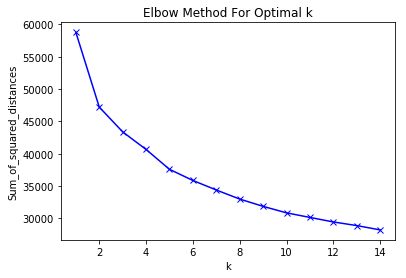

In [15]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

 The difference in Sum of squared distances  between k=1 and k=2 is significant. As k increases from k=2 to k=3 we can see that it is still significant. As K increases from 3 to 4, It seems it’s not as significant anymore. I think we can just stop in k =3.

In [0]:
# kmeans for k=3 (3 clusters)
k_means = cluster.KMeans(n_clusters=3, random_state=0)

In [17]:
k_means.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [18]:
print(k_means.labels_)

[1 0 0 ... 0 2 0]


In [19]:
metrics.adjusted_rand_score(y, k_means.labels_)

0.3634641171259466

# RED WINE - KMEANS CLUSTERING

In [0]:
# Loading the dataset
df_red = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=";")


In [41]:
df_red.shape

(1599, 12)

In [42]:
df_red.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
                         'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
                         'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
df_red.loc[df_red['quality'] < 5, 'quality'] = 0
df_red.loc[df_red['quality'] == 5, 'quality'] = 1
df_red.loc[df_red['quality'] == 6, 'quality'] = 1
df_red.loc[df_red['quality'] > 6, 'quality'] = 2

In [0]:
# Splitting quality into y and keeping the rest of features in X
X = df_red.iloc[:,0:11]
y = df_red.iloc[:,11]

In [45]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [46]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: quality, dtype: int64

In [47]:
y.shape

(1599,)

In [0]:
np.random.seed(3)

In [49]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df_red)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=0)
    k_means = k_means.fit(X)
    Sum_of_squared_distances.append(k_means.inertia_)


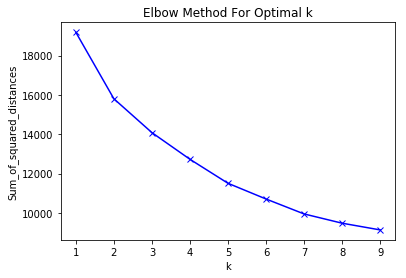

In [51]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
# kmeans for k=3 (3 clusters)
k_means = cluster.KMeans(n_clusters=3, random_state=0)

In [53]:
k_means.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [54]:
print(k_means.labels_[:25])

[0 2 0 1 0 0 0 0 0 2 0 2 0 1 2 2 2 1 0 1 2 2 1 2 0]


In [55]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, k_means.labels_))

0.17326091127250412


In [56]:
metrics.adjusted_rand_score(y, k_means.labels_)

0.025034531862332326